In [2]:
import pandas as pd
from google.cloud import bigquery
%load_ext google.cloud.bigquery

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

sns.set(style='darkgrid', font_scale=1.5)
#sns.set_style('darkgrid', {"xtick.minor.size": 10, "ytick.major.size": 10})
current_palette = sns.color_palette('deep')

In [175]:
client = bigquery.Client()

dataset_id = 'results_docdb'
table_id = 'backbone_0'

table_ref = client.dataset(dataset_id).table(table_id)
# Getting table object
table = client.get_table(table_ref)
# Getting RowIterator object with only 10,000 first rows
rows = client.list_rows(table, max_results=10000)
# Getting the Pandas Dataframe
df_ = rows.to_dataframe()

In [176]:
df_.head()

,appln_id_1,appln_nr_1,appln_auth_1,appln_filing_year_1,appln_kind_1,appln_id_2,appln_nr_2,appln_auth_2,appln_filing_year_2,appln_kind_2,docdb_family_id,docdb_nb_pairs,exact_twins,is_1_pf,is_2_pf
0,330388621,83467310,US,2010,A,497159087,181100283,CY,2018,T,42670422,6,0,0,0
1,54407623,97698007,US,2007,A,15585641,52497,EG,1997,A,25663046,49,0,0,0
2,50244105,36941006,US,2006,A,43705482,75399,SK,1997,A,26708180,3,0,0,0
3,49711400,33597803,US,2003,A,42399621,28759290,PL,1990,A,23706597,3,0,1,0
4,420522490,201214238569,US,2012,A,497159007,181100119,CY,2018,T,47715182,1,1,0,0


### What I can explore in this data?
- Proportion of exact twins to all cases
- number of cases in each authority office
- number of cases in each application kind
- how many exact twins exists in each Docdb family
- Priority Filing Status

In [11]:
# Proportion of twins to all cases

In [ ]:
%%bigquery df_
SELECT 
    *
FROM `usptobias.results_docdb.familyInformation`
WHERE exact_twins='1'
    AND nb_of_pf_claimed_by1=0
    AND nb_of_pf_claimed_by2=0

In [4]:
df_.head()

,docdb_family_id,appln_id_1,appln_kind_1,appln_auth_1,is_1_pf,nb_of_pf_claimed_by1,family_size_in_us,appln_id_2,appln_kind_2,appln_auth_2,is_2_pf,nb_of_pf_claimed_by2,family_size_in_auth2,exact_twins
0,19911220,48927882,A,US,1,0,1,42079888,A,NO,1,0,1,1
1,34863273,53271730,A,US,1,0,1,24293845,A,IL,1,0,1,1
2,54256405,55389969,A,US,1,0,1,2765157,A,AU,1,0,1,1
3,32396408,48670238,A,US,1,0,1,42738619,A,RU,1,0,1,1
4,34139839,50499177,A,US,1,0,1,42208048,A,NZ,1,0,1,1


In [55]:
%%bigquery df_nb_twins
SELECT 
    exact_twins,
    COUNT(*) AS nb_pairs
FROM `usptobias.results_docdb.backbone_0`
GROUP BY exact_twins

In [40]:
dict_map = {0:'not Twins', 1:'Exact Twins'}
df_nb = df_nb_twins.copy()
df_nb['exact_twins'] = df_nb_twins['exact_twins'].map(dict_map)

In [ ]:
df_nb['twins'] = 'Twins Category'
df_nb.pivot(values='nb_pairs', columns='exact_twins', index='twins').plot(kind='bar', stacked=True)#.stack().reset_index()#.unstack(level=-1)

In [ ]:
dir(g.ax.yaxis)

In [79]:
labels = [item.get_text() for item in g.ax.xaxis.get_ticklabels()]


['0', '1']

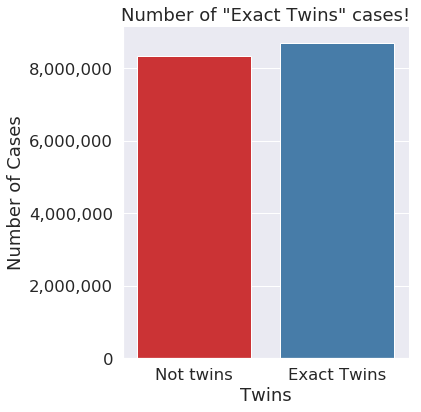

In [144]:
g = sns.catplot(x="exact_twins", y="nb_pairs", ci=95, #hue="class", #col="alone", #col_wrap=2 , #ci='sd',
                data=df_nb_twins, kind='bar', height=6, aspect=0.9, palette='Set1') #
#g.set_ylabels('Counts', fontsize=18)
#g.set_xlabels('X axis', fontsize=18)
#g.set(xscale="log")

## Changing label names
## replace labels
new_labels = ['Not twins', 'Exact Twins']
g.ax.xaxis.set_ticklabels(new_labels)
g.set(xlabel='Twins', ylabel='Number of Cases')

#ax.set_yscale('log')
#g.set_xticklabels(ax.get_xticklabels(), fontdict={'fontsize':16}, rotation=45, ha='right') #or rotation='horizontal'
g.ax.yaxis.get_major_formatter().set_scientific(False)
g.ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

#plt.setp(g._legend.get_title(),fontsize=20)
plt.title('Number of "Exact Twins" cases!', fontsize=18) # comment this line if you are using 'col' feature
plt.show()

## Visualizing the Schema of the table `'Backbone_0'`

In [10]:
# Showing the Schema
dataset_id = 'results_docdb'
table_id = 'backbone_0'
# Getting the table's information
table_ref = client.dataset(dataset_id).table(table_id)
table = client.get_table(table_ref)

list_schema = [[x.name, x.field_type, x.mode] for x in table.schema]
pd.DataFrame(list_schema, columns=['Name', 'Type', 'Mode']).set_index('Name')

,Type,Mode
Name,,
appln_id_1,INTEGER,NULLABLE
appln_nr_1,STRING,NULLABLE
appln_auth_1,STRING,NULLABLE
appln_filing_year_1,INTEGER,NULLABLE
appln_kind_1,STRING,NULLABLE
appln_id_2,INTEGER,NULLABLE
appln_nr_2,STRING,NULLABLE
appln_auth_2,STRING,NULLABLE
appln_filing_year_2,INTEGER,NULLABLE


## Counting Number of Cases in each Authority office

In [86]:
%%bigquery df_nb_auth
SELECT 
    appln_auth_2,
    exact_twins,
    COUNT(*) AS nb_cases
FROM `usptobias.results_docdb.backbone_0`
GROUP BY appln_auth_2, exact_twins
ORDER BY nb_cases DESC

In [88]:
# Changing the values in 'exact_twins' column
dict_map = {0:'not Twins', 1:'Exact Twins'}
df_nb_auth['exact_twins'] = df_nb_auth['exact_twins'].map(dict_map)

In [100]:
# Keeping the 15 offices with highest number of cases
auth_list = df_nb_auth.groupby(by=['appln_auth_2'])[['nb_cases']].sum()\
                      .reset_index().sort_values(by=['nb_cases'], ascending=False)\
                      .appln_auth_2.values[:15]

In [122]:
# Preparing the dataframe for plotting
df_nb_auth.columns = ['Authority Office', 'Is a twin?', 'nb_cases']
df_plot = df_nb_auth[df_nb_auth['Authority Office'].isin(auth_list)].pivot(values='nb_cases', columns='Is a twin?', index='Authority Office')

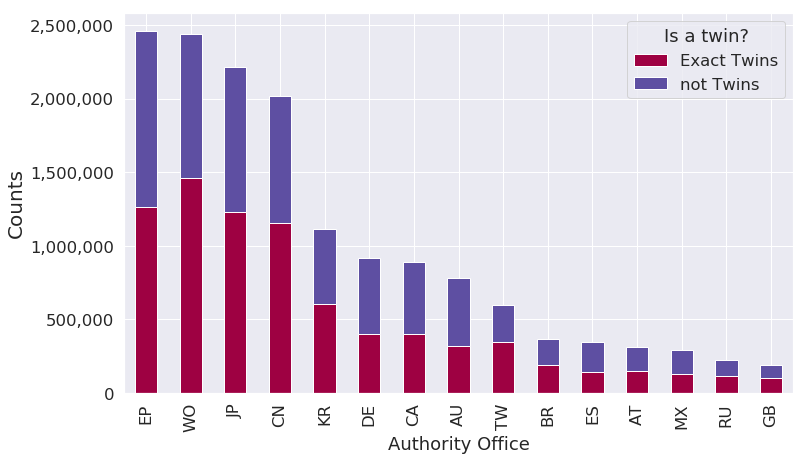

In [121]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12,7))
df_plot.reindex(index=auth_list).plot(ax=ax, kind='bar', stacked=True, colormap='Spectral')
ax.bar
#ax.set_xlabel('Sex', fontsize=18)
ax.set_ylabel('Counts', fontsize=20)
#ax.set_title('My title', fontsize=20)
#ax.legend(#['First', 'Second', 'Third'], # you can send a list to change the legends
#          loc='center left', bbox_to_anchor=(1., 0.5)) # bbox_to_anchor is for putting legend outside the plot
#ax.set_yscale('log')
#ax.set_xticks(ax.get_xticks()) # list of xticks positions
#ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontsize':16}, rotation=45, ha='right') #or rotation='horizontal'
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

## Counting Distinct number of applications

In [136]:
%%bigquery df_nb_auth_2
SELECT 
    appln_auth_2,
    exact_twins,
    COUNT(DISTINCT appln_id_2) AS nb_unique_cases
FROM `usptobias.results_docdb.backbone_0`
GROUP BY appln_auth_2, exact_twins
ORDER BY nb_unique_cases DESC

In [137]:
# Changing the values in 'exact_twins' column
dict_map = {0:'not Twins', 1:'Exact Twins'}
df_nb_auth_2['exact_twins'] = df_nb_auth_2['exact_twins'].map(dict_map)

In [138]:
# Keeping the 15 offices with highest number of cases
auth_list2 = df_nb_auth_2.groupby(by=['appln_auth_2'])[['nb_unique_cases']].sum()\
                         .reset_index().sort_values(by=['nb_unique_cases'], ascending=False)\
                         .appln_auth_2.values[:15]

In [139]:
# Preparing the dataframe for plotting
df_nb_auth_2.columns = ['Authority Office', 'Is a twin?', 'nb_unique_cases']
df_plot = df_nb_auth_2[df_nb_auth_2['Authority Office'].isin(auth_list2)]\
            .pivot(values='nb_unique_cases', columns='Is a twin?', index='Authority Office')

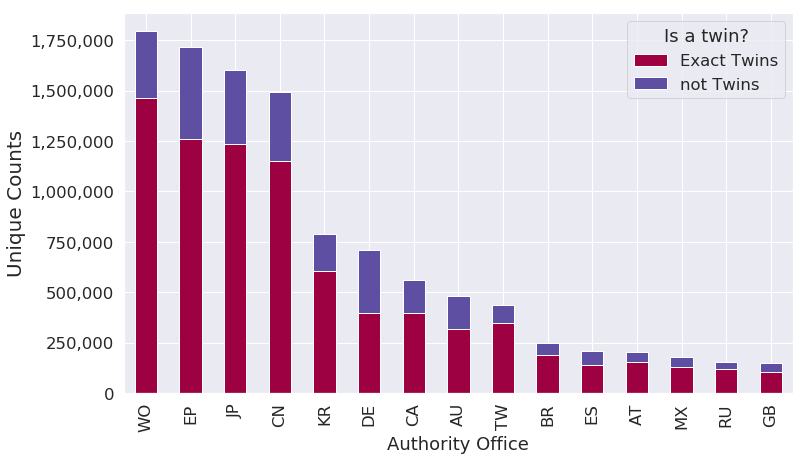

In [141]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12,7))
df_plot.reindex(index=auth_list2).plot(ax=ax, kind='bar', stacked=True, colormap='Spectral')
ax.bar
#ax.set_xlabel('Sex', fontsize=18)
ax.set_ylabel('Unique Counts', fontsize=20)
#ax.set_title('My title', fontsize=20)
#ax.legend(#['First', 'Second', 'Third'], # you can send a list to change the legends
#          loc='center left', bbox_to_anchor=(1., 0.5)) # bbox_to_anchor is for putting legend outside the plot
#ax.set_yscale('log')
#ax.set_xticks(ax.get_xticks()) # list of xticks positions
#ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontsize':16}, rotation=45, ha='right') #or rotation='horizontal'
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

## Priority Filing Status

In [161]:
%%bigquery df_pf_1
SELECT 
    'US' AS appln_auth,
    exact_twins,
    COUNT(DISTINCT appln_id_1) AS nb_cases
FROM `usptobias.results_docdb.backbone_0`
GROUP BY appln_auth_1, exact_twins
ORDER BY nb_cases DESC

In [162]:
%%bigquery df_pf_2
SELECT 
    appln_auth_2 AS appln_auth,
    exact_twins,
    COUNT(DISTINCT appln_id_2) AS nb_cases
FROM `usptobias.results_docdb.backbone_0`
GROUP BY appln_auth_2, exact_twins
ORDER BY nb_cases DESC

In [171]:
df_pf = pd.concat([df_pf_1, df_pf_2])
auth_list = df_pf.groupby(by=['appln_auth'])[['nb_cases']].sum()\
                 .reset_index().sort_values(by=['nb_cases'], ascending=False)\
                 .reset_index(drop=True).appln_auth.values[:15]

In [166]:
auth_list

array(['US', 'WO', 'EP', 'JP', 'CN', 'KR', 'DE', 'CA', 'AU', 'TW', 'BR',
       'ES', 'AT', 'MX', 'RU'], dtype=object)

In [172]:
# Changing the values in 'exact_twins' column
dict_map = {0:'not Twins', 1:'Exact Twins'}
df_pf['exact_twins'] = df_pf['exact_twins'].map(dict_map)

In [173]:
# Preparing the dataframe for plotting
df_pf.columns = ['Authority Office', 'Is a twin?', 'nb_cases']
df_plot = df_pf[df_pf['Authority Office'].isin(auth_list)]\
            .pivot(values='nb_cases', columns='Is a twin?', index='Authority Office')

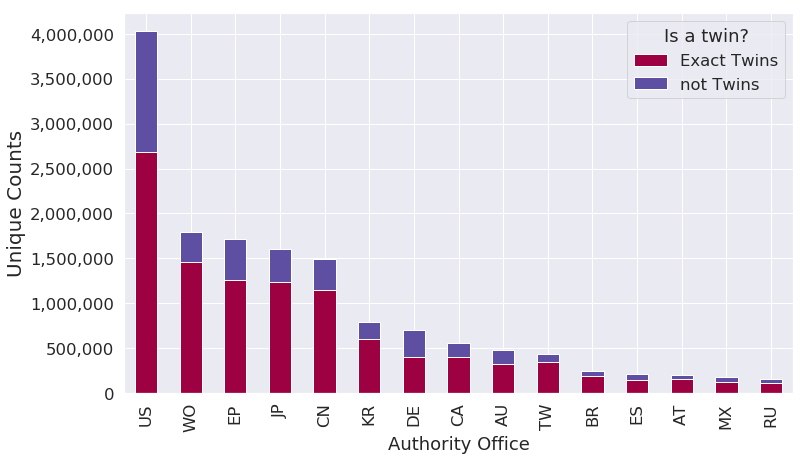

In [181]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12,7))
df_plot.reindex(index=auth_list).plot(ax=ax, kind='bar', stacked=True, colormap='Spectral')
ax.bar
#ax.set_xlabel('Sex', fontsize=18)
ax.set_ylabel('Unique Counts', fontsize=20)
#ax.set_title('My title', fontsize=20)
#ax.legend(#['First', 'Second', 'Third'], # you can send a list to change the legends
#          loc='center left', bbox_to_anchor=(1., 0.5)) # bbox_to_anchor is for putting legend outside the plot
#ax.set_yscale('log')
#ax.set_xticks(ax.get_xticks()) # list of xticks positions
#ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontsize':16}, rotation=45, ha='right') #or rotation='horizontal'
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()